In [1]:
import math
import collections
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

In [3]:
def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

In [4]:
hilo = getweather.getyear("HILO", ["TMIN", "TMAX"], 2000)

Using ('USW00021504', 19.7192, -155.0489, 8.8, 'HI', 'HILO INTL AP 87', 'GSN', '', '91285').


In [6]:
hilo["TMIN"]

array([16.1, 17.8, 17.8, 17.8, 17.2, 17.2, 17.2, 16.7, 17.2, 18.9, 17.8,
       17.2, 18.9, 18.3, 17.2, 17.8, 16.7, 16.1, 15. , 16.1, 17.8, 18.3,
       15. , 14.4, 15. , 15.6, 17.8, 16.7, 16.7, 17.8, 16.7, 17.8, 16.7,
       15. , 14.4, 15.6, 15. , 16.7, 16.7, 16.7, 16.7, 17.8, 17.8, 17.2,
       16.1, 17.2, 18.9, 17.2, 17.2, 15. , 14.4, 17.2, 17.2, 17.8, 18.9,
       17.8, 18.3, 17.2, 16.7, 16.7, 17.8, 17.8, 16.7, 18.9, 17.2, 18.3,
       18.3, 16.7, 16.1, 17.2, 17.8, 17.2, 17.2, 17.2, 17.2, 17.2, 17.8,
       17.2, 18.9, 17.8, 18.3, 17.8, 18.3, 17.2, 17.8, 18.3, 18.3, 18.3,
       17.8, 18.9, 17.2, 17.8, 18.9, 18.3, 18.3, 18.3, 17.2, 17.2, 17.8,
       18.3, 18.3, 18.3, 18.3, 18.3, 19.4, 18.3, 18.9, 16.7, 18.3, 17.8,
       17.8, 17.2, 18.9, 17.8, 18.9, 19.4, 18.9, 19.4, 19.4, 20. , 18.3,
       18.3, 18.9, 20. , 18.9, 18.3, 18.9, 17.8, 17.8, 18.9, 18.3, 19.4,
       20. , 18.9, 20.6, 17.8, 19.4, 20. , 20.6, 18.9, 19.4, 18.3, 17.8,
       18.3, 19.4, 19.4, 20.6, 20.6, 19.4, 19.4, 19

In [7]:
hilo["TMAX"]

array([26.7, 26.1, 26.7, 26.1, 24.4, 23.9, 23.3, 22.2, 23.3, 25.6, 23.9,
       23.3, 22.2, 25. , 24.4, 22.8, 23.3, 21.7, 23.9, 23.3, 23.9, 23.9,
       23.9, 23.9, 24.4, 23.9, 23.9, 23.9, 23.3, 25.6, 25.6, 25.6, 25.6,
       25.6, 26.1, 26.1, 26.7, 26.7, 27.2, 26.7, 26.7, 26.7, 27.2, 26.7,
       26.7, 27.8, 28.3, 27.8, 27.2, 25.6, 26.1, 26.7, 26.7, 27.2, 27.2,
       27.8, 27.2, 27.2, 27.2, 27.8, 26.7, 26.7, 27.2, 27.2, 26.7, 26.1,
       25. , 26.7, 27.8, 27.8, 27.8, 27.2, 27.2, 27.8, 27.8, 28.9, 27.2,
       25.6, 26.7, 27.2, 26.1, 26.1, 25.6, 24.4, 26.1, 25.6, 24.4, 24.4,
       25.6, 26.1, 26.7, 26.1, 25.6, 25. , 24.4, 22.8, 25. , 25.6, 25.6,
       21.7, 21.7, 22.8, 25. , 26.1, 26.7, 25.6, 25.6, 23.3, 25.6, 26.1,
       25. , 25.6, 27.2, 27.2, 25. , 26.1, 26.1, 25. , 26.7, 25.6, 26.7,
       26.7, 26.1, 27.8, 27.8, 27.2, 27.8, 28.3, 27.8, 27.2, 28.3, 26.1,
       27.2, 26.7, 26.7, 27.8, 27.2, 27.8, 26.7, 27.8, 27.2, 27.8, 26.7,
       27.8, 27.2, 27.8, 26.7, 27.2, 27.2, 27.8, 27

In [10]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [11]:
np.mean(hilo["TMIN"]), np.min(hilo["TMIN"]), np.max(hilo["TMIN"])

(19.102739726027398, 14.4, 23.3)

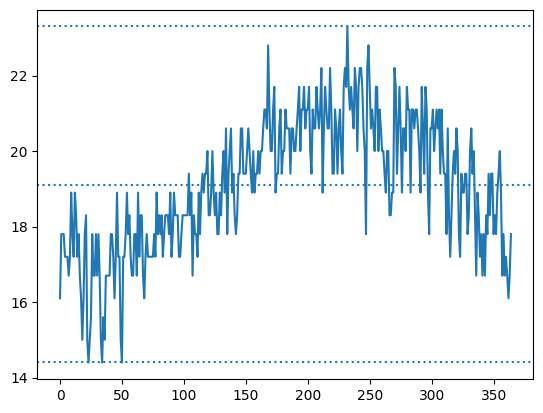

In [15]:
pp.plot(hilo["TMIN"])
for value in [np.mean(hilo["TMIN"]), np.min(hilo["TMIN"]), np.max(hilo["TMIN"])]:
    pp.axhline(value, linestyle=":")

In [16]:
mean, err = np.mean(hilo["TMIN"]), math.sqrt(np.var(hilo["TMIN"]))

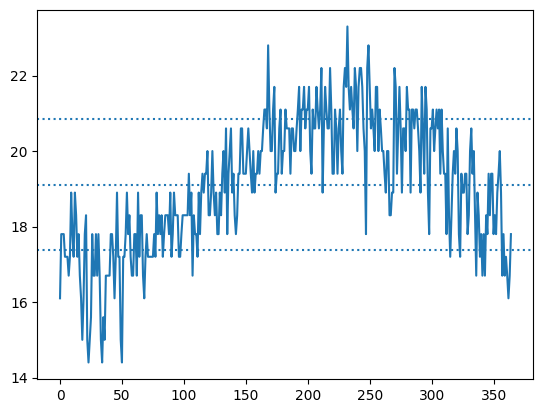

In [17]:
pp.plot(hilo["TMIN"])
for value in [mean, mean + err, mean - err]:
    pp.axhline(value, linestyle=":")

In [20]:
rain = getweather.getyear("HILO", ["PRCP"], 2000)["PRCP"]

In [21]:
rain

array([0.000e+00, 8.000e+00, 3.000e+01, 1.300e+01, 6.600e+01, 8.600e+01,
       2.310e+02, 9.100e+01, 9.100e+01, 1.350e+02, 4.100e+01, 6.350e+02,
       1.214e+03, 4.300e+01, 2.570e+02, 5.660e+02, 2.720e+02, 2.010e+02,
       8.600e+01, 6.900e+01, 1.170e+02, 1.420e+02, 3.000e+00, 0.000e+00,
       0.000e+00, 3.000e+01, 3.600e+01, 1.500e+01, 3.300e+01, 5.000e+00,
       2.300e+01, 5.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 1.000e+01, 1.500e+01,
       0.000e+00, 2.800e+01, 1.000e+01, 0.000e+00, 0.000e+00, 2.300e+01,
       5.100e+01, 2.800e+01, 6.900e+01, 5.800e+01, 5.000e+00, 1.800e+01,
       5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 1.500e+02,
       1.500e+01, 2.000e+01, 5.000e+00, 6.400e+01, 

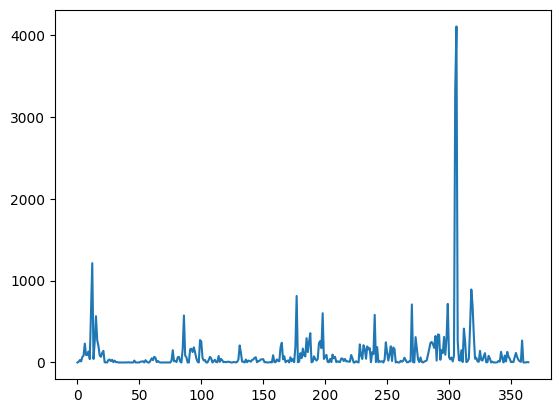

In [22]:
pp.plot(rain)

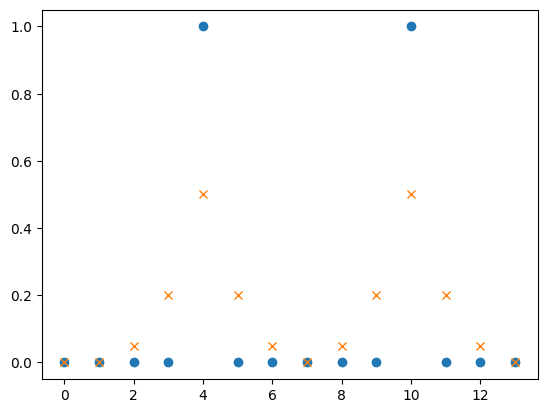

In [23]:
x = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])
# mask in second stage
mask = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
y = np.correlate(x, mask, 'same')

pp.plot(x, 'o')
pp.plot(y, 'x')

In [24]:
np.ones(10) / 10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

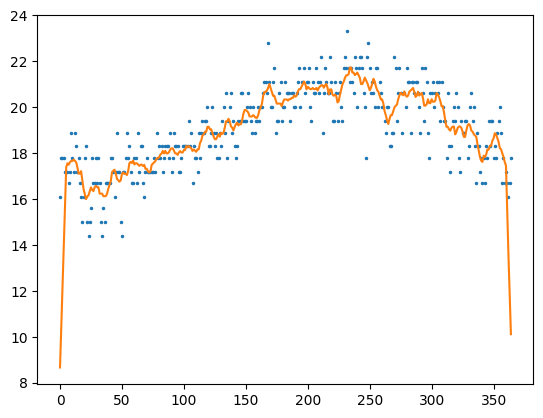

In [25]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))

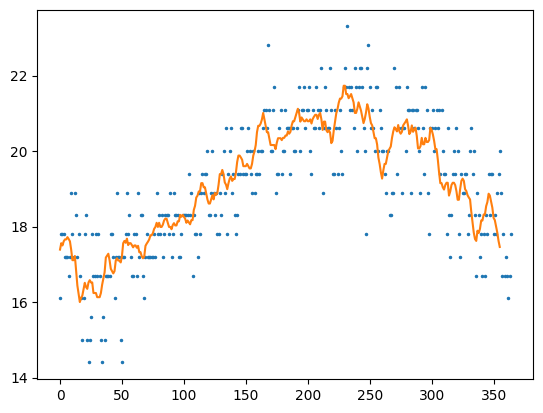

In [26]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))

In [27]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

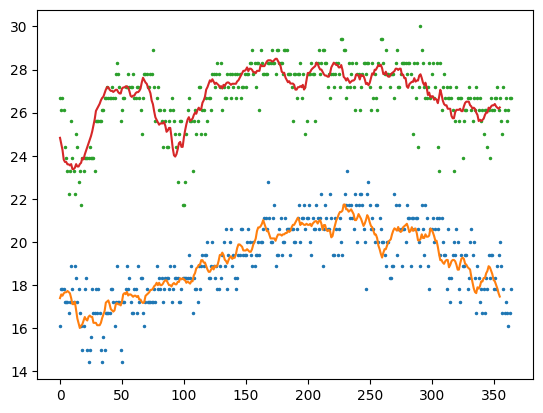

In [30]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(smooth(hilo['TMIN']))
pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(smooth(hilo['TMAX']))

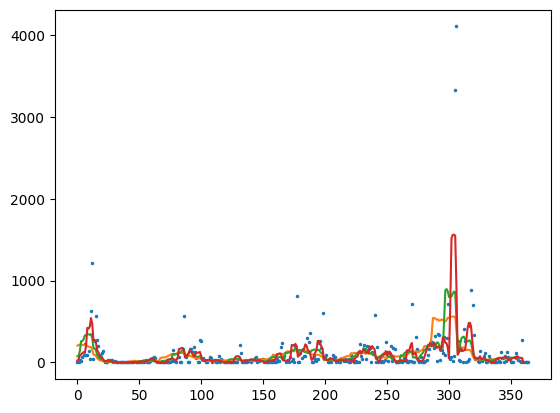

In [34]:
pp.plot(rain, '.', ms=3)
pp.plot(smooth(rain, 20))
pp.plot(smooth(rain, 10))
pp.plot(smooth(rain, 5))

In [62]:
# def plotsmooth(station,year):
#     stationdata = getweather.getyear(station_name=station,elements=['TMIN','TMAX'],year=year)

#     for obs in ['TMIN','TMAX']:
#         stationdata[obs] = fillnans(stationdata[obs])

#         pp.plot(stationdata[obs],'.',ms=1)
#         pp.plot(range(10,356), smooth(stationdata[obs],20))
#         # pp.plot(range(10,356), smooth(stationdata[obs],20), label=f"{obs} {year}")
#     pp.title(station)
#     pp.axis(xmin=1,xmax=365,ymin=10,ymax=45)


def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    for obs in ['TMIN', 'TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])

        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10, 356), smooth(stationdata[obs], 20))

    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-30, ymax=45)

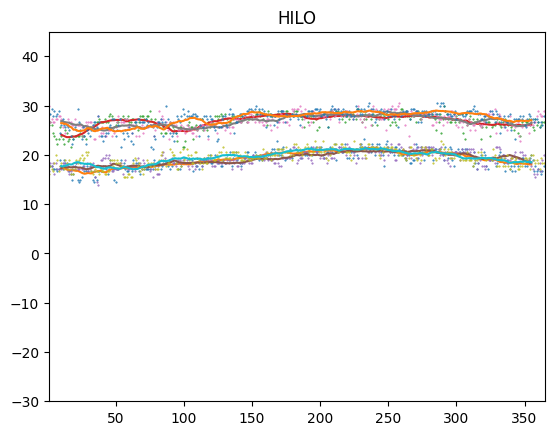

In [63]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)
# pp.legend(fontsize='small',ncol=2)

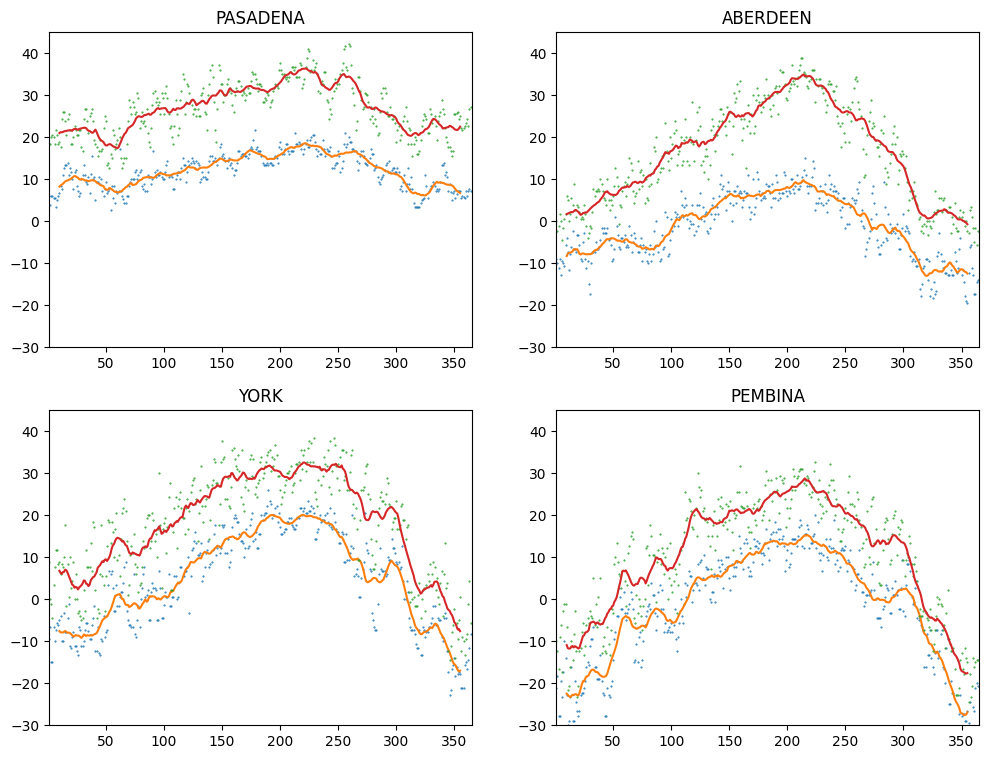

In [64]:
# plot four cities in a two-by-two grid

pp.figure(figsize=(12, 9))

for i, city in enumerate(['PASADENA', 'ABERDEEN', 'YORK', 'PEMBINA']):
    pp.subplot(2, 2, i+1)
    plotsmooth(city, 2000)